In [4]:
from dotenv import load_dotenv
import os

In [8]:
db_pwd = os.getenv('DB_PASSWORD')
db_port = os.getenv('DB_PORT')
db_host = os.getenv('DB_HOST')
db_user = os.getenv('DB_USER')
db_name = os.getenv('DB_NAME')

In [9]:
from pymysql import Connect
import pandas as pd
import pyodbc, psycopg2

db_conn = psycopg2.connect(database=db_name, user=db_user, password=db_pwd, host=db_host, port=db_port)

cursor = db_conn.cursor()

cursor.execute(f"""
select * 
from "KMO"
""")

kmo_data = pd.DataFrame(cursor.fetchall(), columns=['ondnr','urban', 'balanstotaal', 'omzet','personeelsbestanden','foundingdate','environment','social', 'governance', '?column?'])

In [10]:
kmo_data

,ondnr,urban,balanstotaal,omzet,personeelsbestanden,foundingdate,environment,social,governance,?column?
0,417609051,0.7692307692307693,26922177.69,50191983.53,66.0,1977-10-13,0.000000,0.018586,0.000000,0.006195
1,461056836,1.875,2805793.44,0,10.0,1997-07-07,0.000000,0.000000,0.710802,0.236934
2,219395192,0.8490566037735849,None,None,NaN,1979-02-13,0.000000,0.000000,0.633410,0.211137
3,447763183,1.4137931034482758,478133071.39,2438500.28,10.0,1992-06-30,0.000000,0.000000,0.715486,0.238495
4,432406994,0.6572222,39999869.6,65496051.3,45.0,1987-11-10,0.000000,0.000000,0.795257,0.265086
...,...,...,...,...,...,...,...,...,...,...
12626,200065765,0.92,None,None,NaN,1960-08-09,0.999628,0.786038,0.991153,0.925607
12627,421322567,0.819672131147541,6665510.66,19686095.04,20.0,1981-01-26,0.999703,0.974574,0.950264,0.974847
12628,204212714,0.8490566037735849,155563377.35,9373091.18,48.0,1968-11-13,0.999777,0.957104,0.993829,0.983570
12629,407037833,1.2830188679245282,29987289.57,0,13.0,1957-07-20,0.999926,0.894952,0.977251,0.957376


In [13]:
import datetime

kmo_data = kmo_data.dropna()
kmo_data['omzet'] = kmo_data['omzet'].astype('int64')
kmo_data['balanstotaal'] = kmo_data['balanstotaal'].astype('int64')
kmo_data['personeelsbestanden'] = kmo_data['personeelsbestanden'].astype('int64')
kmo_data['dagensindsoorsprong'] = (pd.Timestamp.now() - pd.to_datetime(kmo_data['foundingdate'], format="%Y-%m-%d")).dt.days

In [14]:
query = """
SELECT ondernemingsnummer, 
	(SELECT SUM(e) FROM UNNEST(environment) e) as som,
	(SELECT SUM(s) FROM UNNEST(social) s) as som2,
	(SELECT SUM(g) FROM UNNEST(governance) g) as som3
from "KMO"
where (SELECT SUM(e) FROM UNNEST(environment) e) is not null 
	and (SELECT SUM(s) FROM UNNEST(social) s) is not null
	and (SELECT SUM(g) FROM UNNEST(governance) g) is not null
order by som desc
"""

cursor.execute(query)

rows = cursor.fetchall()

scores = pd.DataFrame(rows, columns=['ondnr','environment', 'social', 'governance'])

In [15]:
scores.head()

,ondnr,environment,social,governance
0,407037833,3.033072,0.666667,0.8528141
1,467189018,2.918118,0.7460811,0.6875
2,421322567,2.416465,0.95283,0.333333
3,434882672,2.3371931,0.0909091,0
4,405069822,2.305957,0.705882,0


In [16]:
kmo_data.head()

,ondnr,urban,balanstotaal,omzet,personeelsbestanden,foundingdate,environment,social,governance,?column?,dagensindsoorsprong
0,417609051,0.7692307692307693,26922177,50191983,66,1977-10-13,0.0,0.018586,0.000000,0.006195,16504
1,461056836,1.875,2805793,0,10,1997-07-07,0.0,0.000000,0.710802,0.236934,9297
3,447763183,1.4137931034482758,478133071,2438500,10,1992-06-30,0.0,0.000000,0.715486,0.238495,11130
4,432406994,0.6572222,39999869,65496051,45,1987-11-10,0.0,0.000000,0.795257,0.265086,12824
9,461659820,1.7885906040268456,40768896,43692472,16,1997-10-13,0.0,0.280871,0.000000,0.093624,9199


In [17]:
import seaborn as sb
from matplotlib import pyplot

KeyError: 'sectornaam'

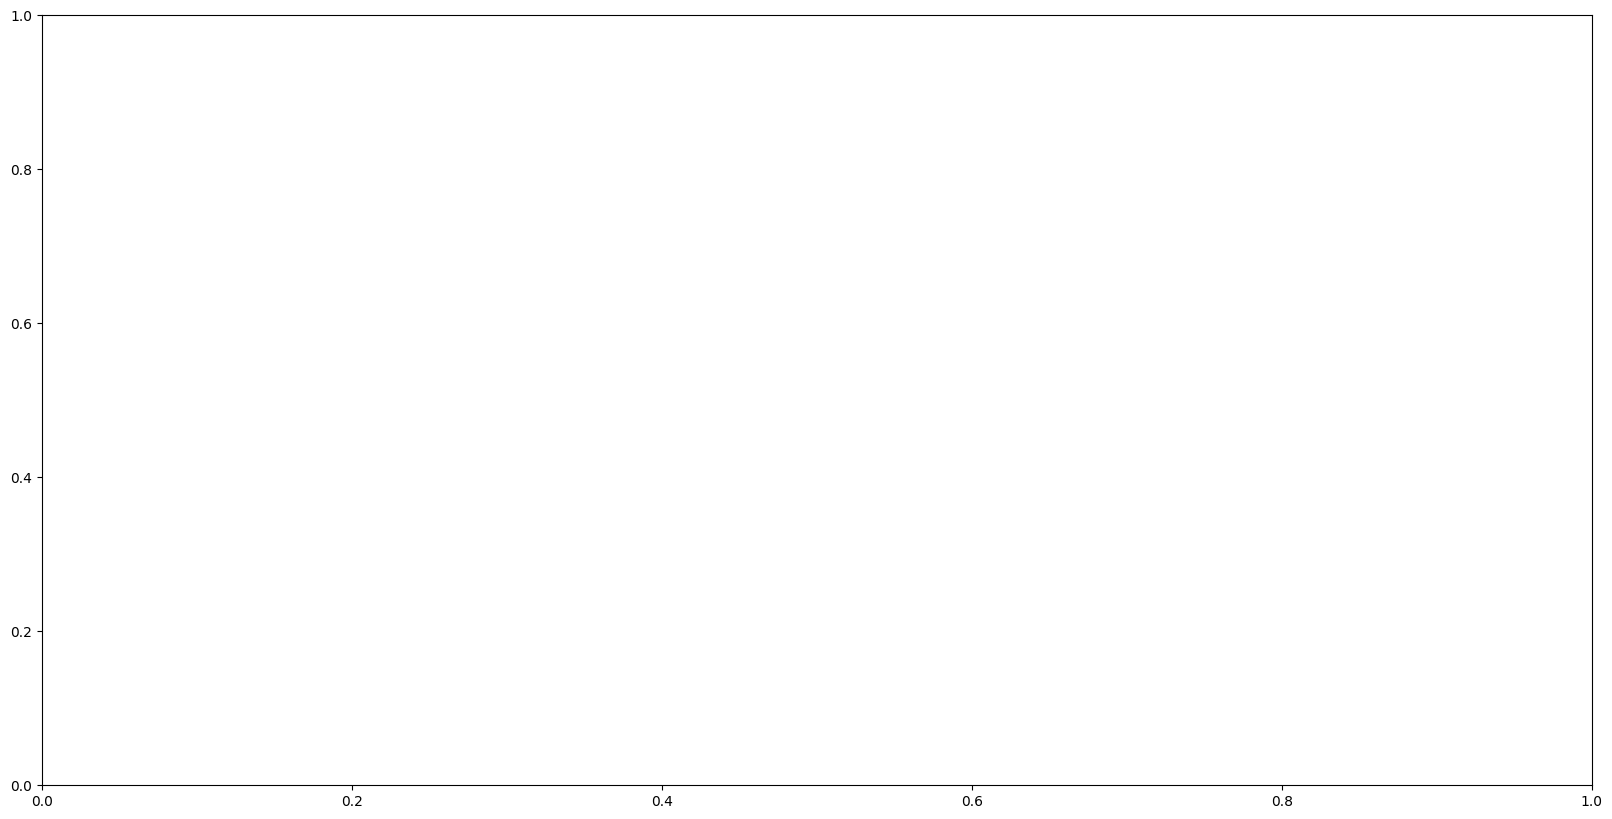

In [18]:
fig, ax = pyplot.subplots(figsize=[20,10])
sb.countplot(data=kmo_data, y='sectornaam', order=kmo_data['sectornaam'].value_counts().index, ax=ax)

totale verhouding!! kijken hoe onze "sample" staat tegenover de totale realiteit

In [19]:
import math
kmo_data['hasFunctionalWebsite'] = ~kmo_data['website'].str.contains('unavailable')
fig, ax = pyplot.subplots(figsize=[20,10])
sb.countplot(data=kmo_data, y='hasFunctionalWebsite', ax=ax)
kmo_data['hasFunctionalWebsite']

KeyError: 'website'

<AxesSubplot: xlabel='count', ylabel='beursnotatie'>

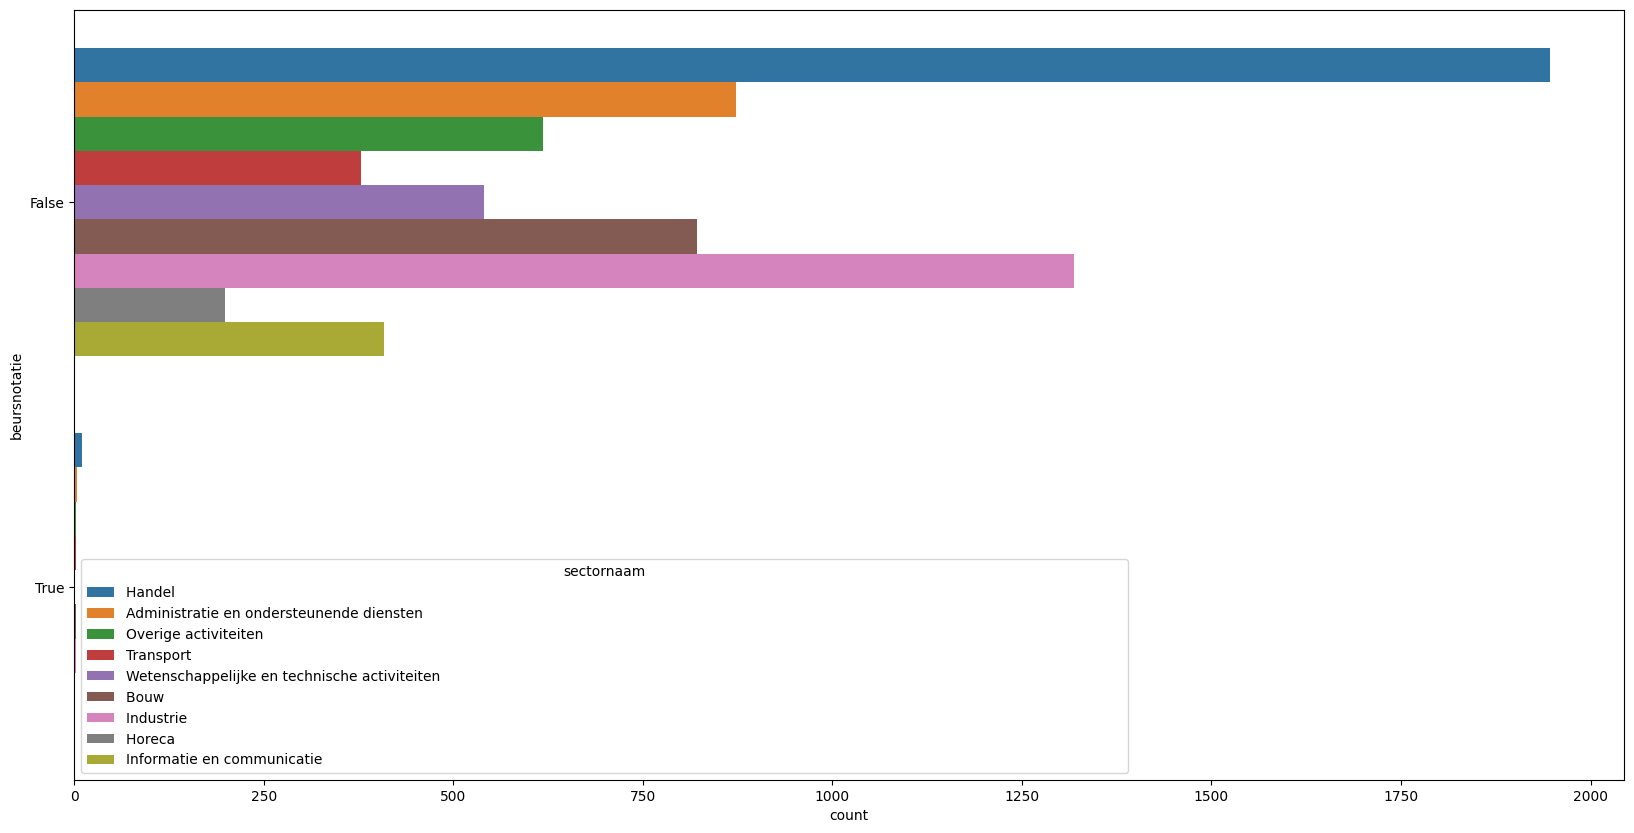

In [77]:
fig, ax = pyplot.subplots(figsize=[20,10])
sb.countplot(data=kmo_data, y='beursnotatie', ax=ax, hue='sectornaam')

[Text(0, 0, '7107'), Text(0, 0, '25')]

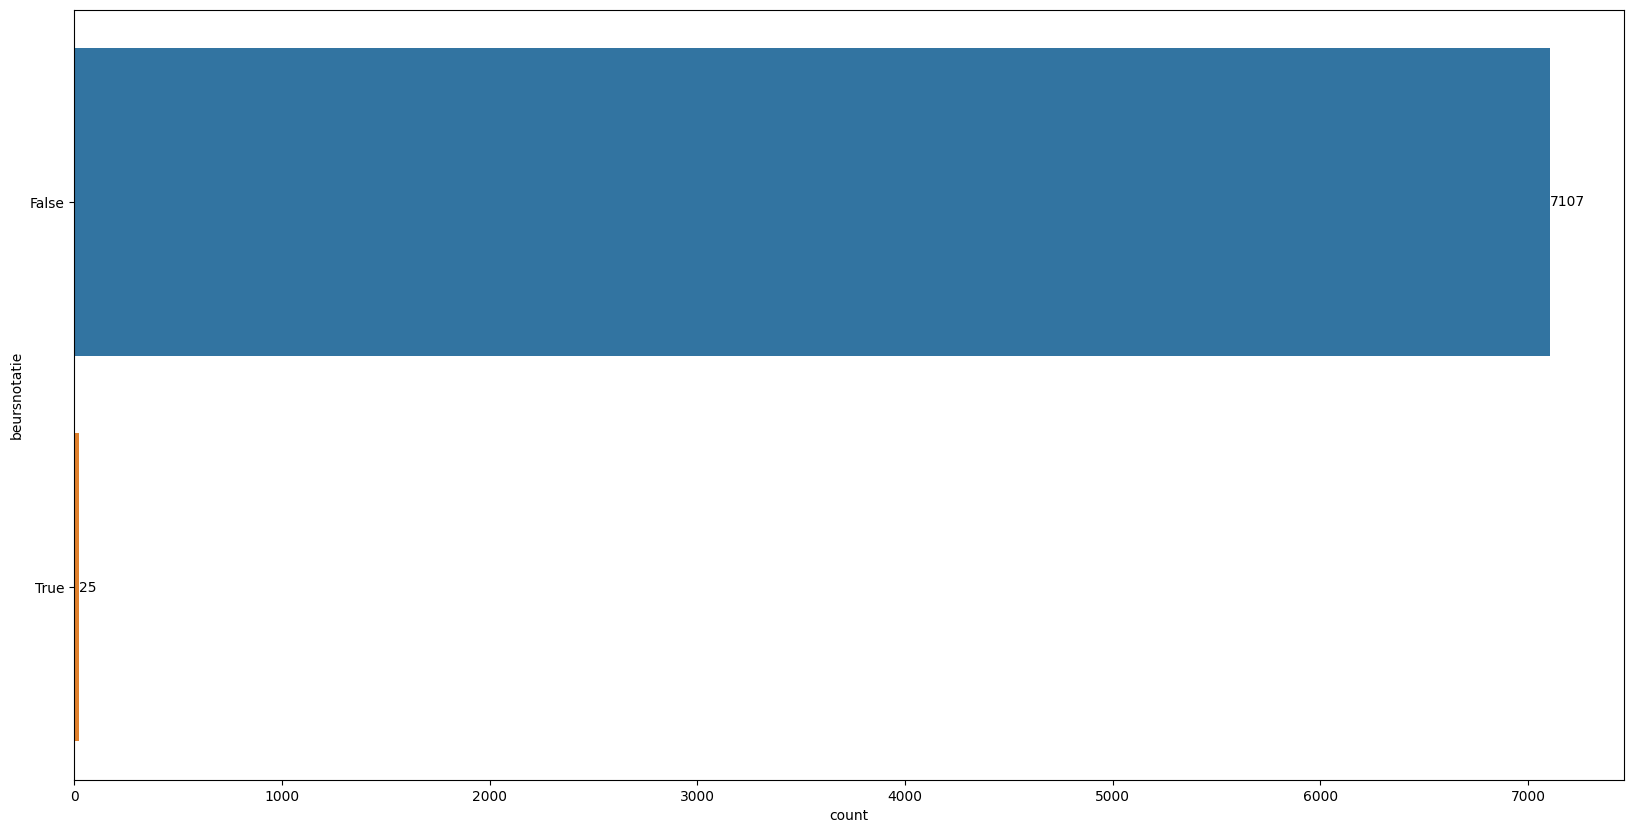

In [78]:
fig, ax = pyplot.subplots(figsize=[20,10])
sb.countplot(data=kmo_data, y='beursnotatie', ax=ax)
ax.bar_label(ax.containers[0])

[Text(0, 0, '7122'), Text(0, 0, '9'), Text(0, 0, '1')]

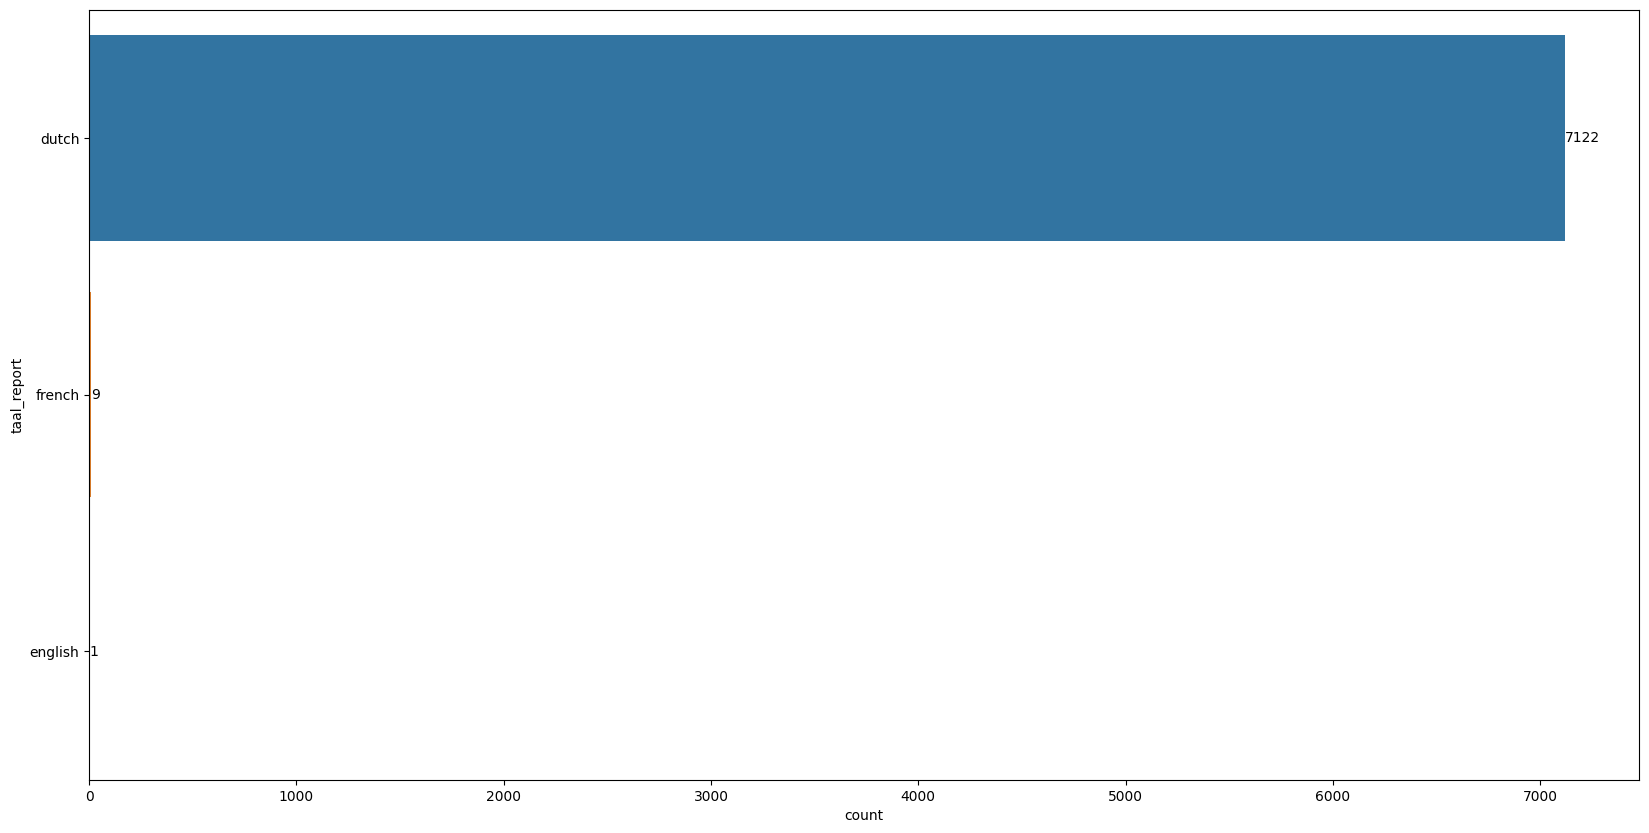

In [79]:
fig, ax = pyplot.subplots(figsize=[20,10])
sb.countplot(data=kmo_data, y='taal_report', ax=ax)
ax.bar_label(ax.containers[0])

<AxesSubplot: xlabel='verstedelijking', ylabel='Count'>

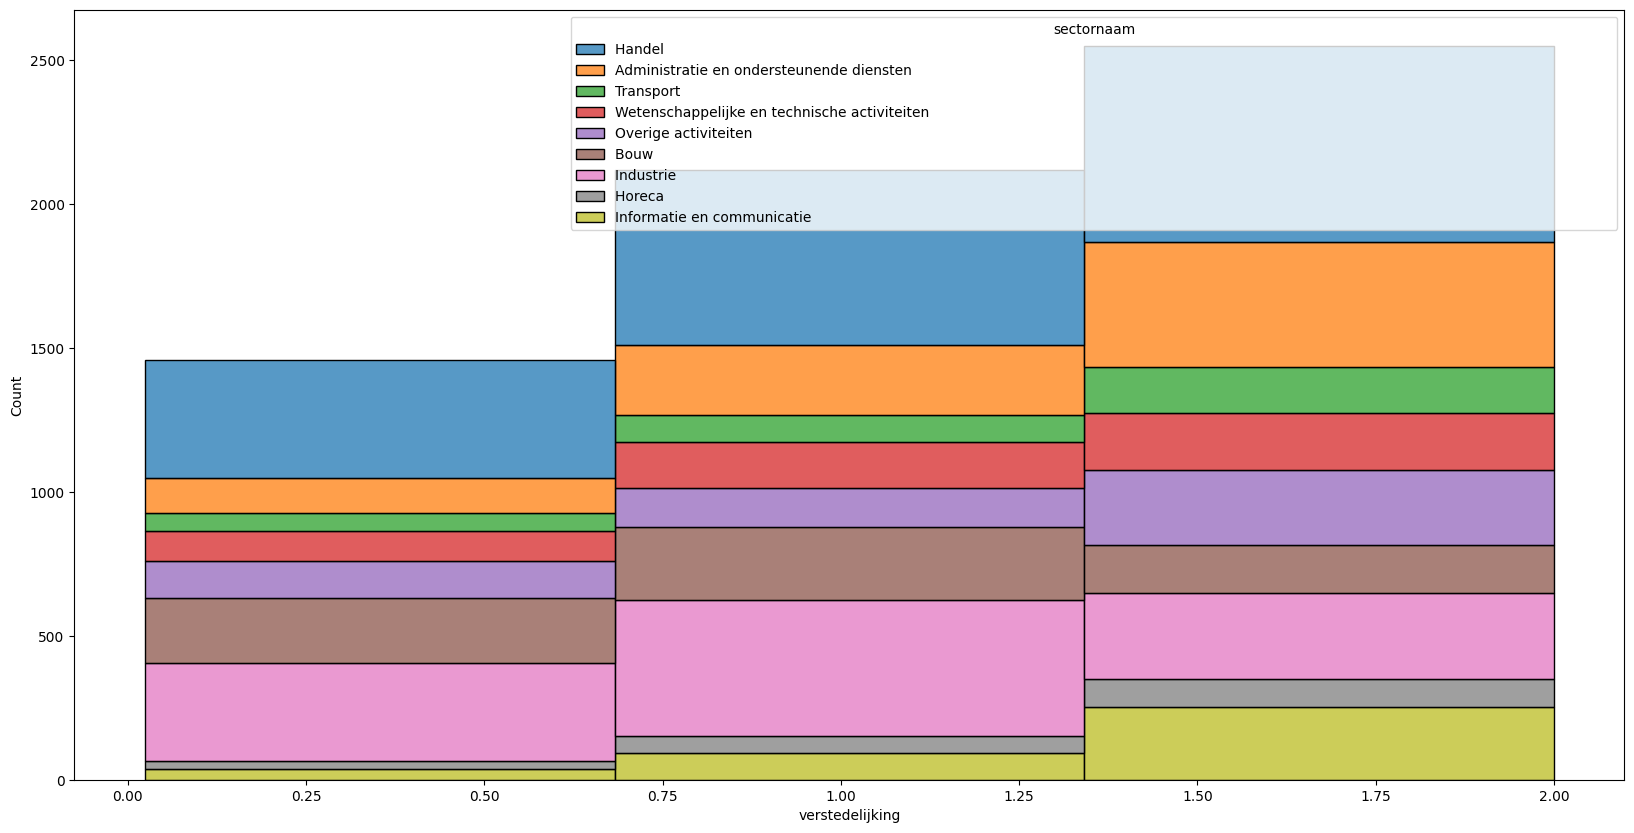

In [80]:
verstedelijking=kmo_data[(kmo_data['verstedelijking'] > 0)]
fig, ax = pyplot.subplots(figsize=[20,10])
sb.histplot(data=verstedelijking, x='verstedelijking', bins=3, hue='sectornaam', multiple='stack', ax=ax)

<AxesSubplot: xlabel='personeel', ylabel='Count'>

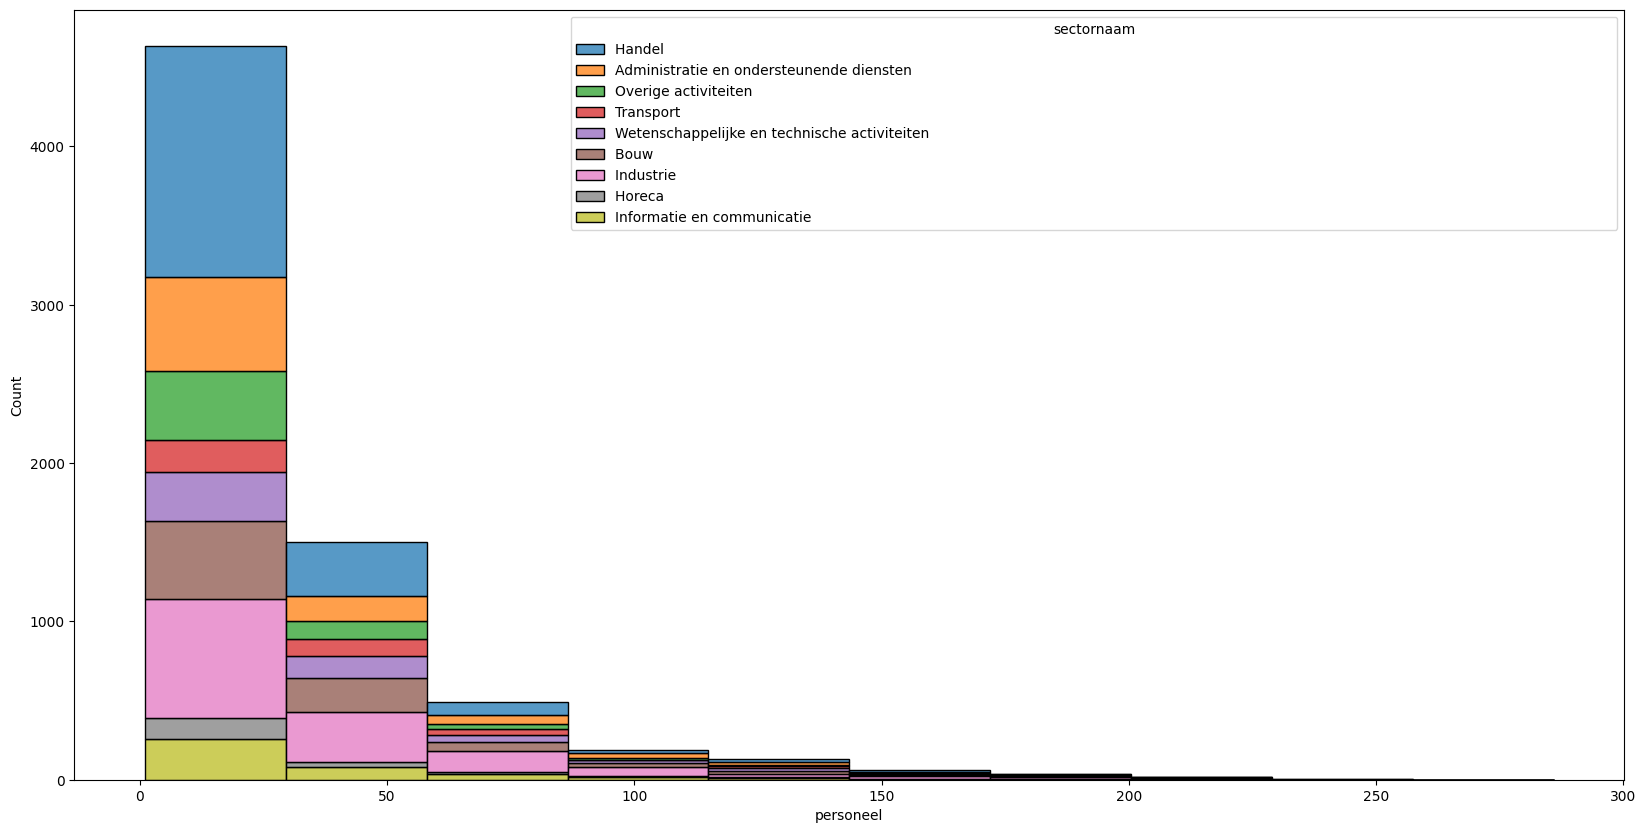

In [81]:
personeel = kmo_data[(kmo_data['personeel'] > 0)]
fig, ax = pyplot.subplots(figsize=[20,10])
sb.histplot(data=personeel, x='personeel', bins=10, hue='sectornaam', multiple='stack', ax=ax)

<AxesSubplot: xlabel='dagensindsoorsprong', ylabel='Count'>

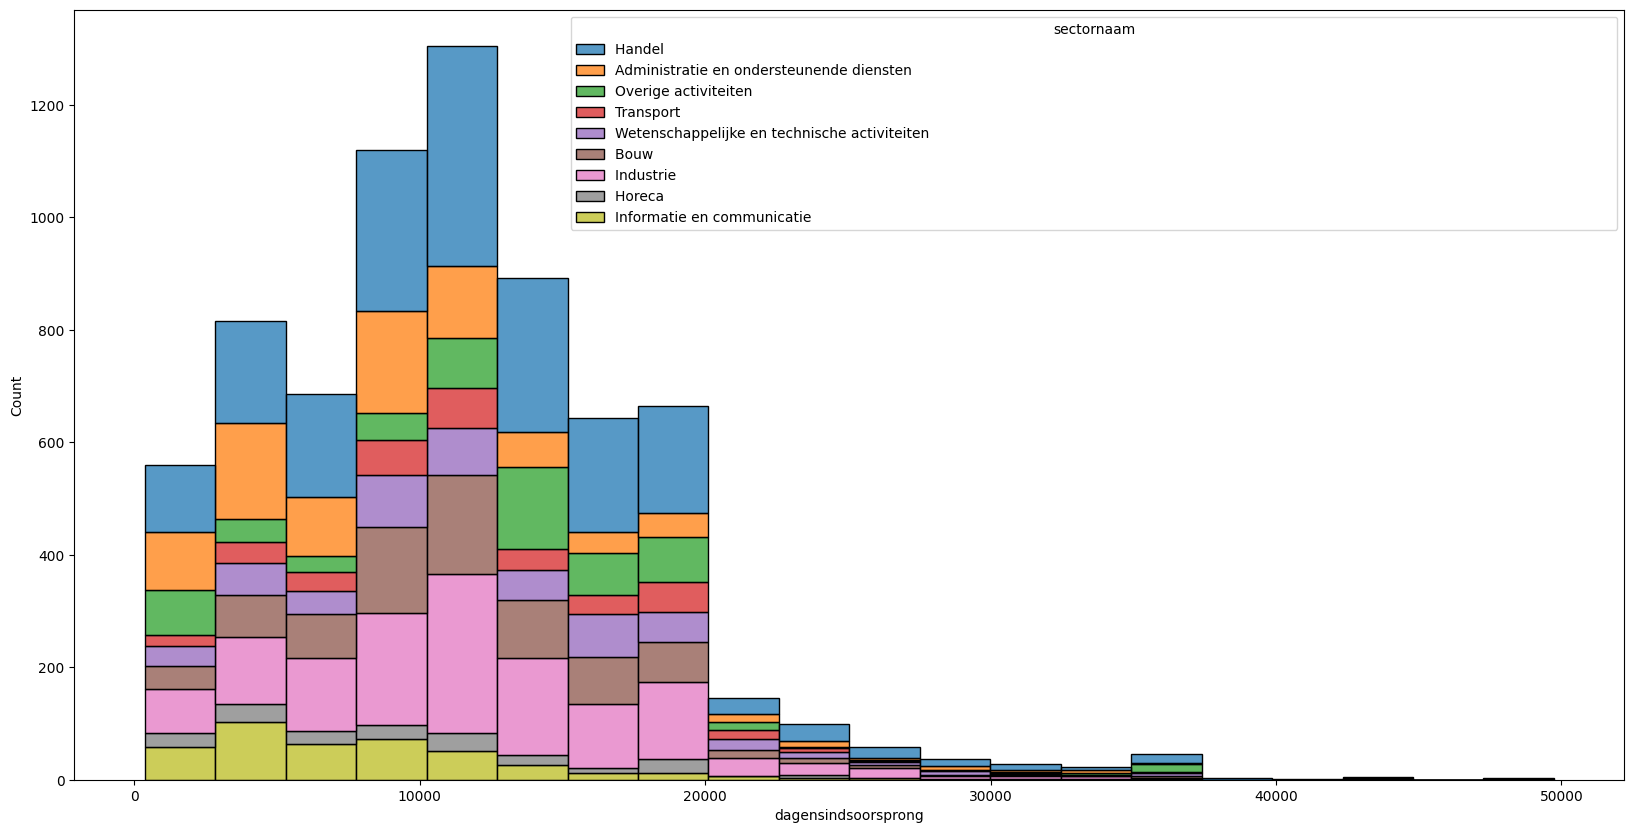

In [84]:
fig, ax = pyplot.subplots(figsize=[20,10])
sb.histplot(data=kmo_data, x='dagensindsoorsprong', bins=20, hue='sectornaam', multiple='stack', ax=ax)

testing:
* "hoe juist is de fout"? 
* steekproeven, meerdere bedrijven eruit halen
* bij één casus: probabiliteit tonen + werkwijze
* end-to-end testen
* één structuur + deductief: centraliseren!!


Links gebruiken bij Trello
* functionaliteit --> pythonbestand